# Zadanie 1 - Dataset 66
#### Alqnatri A., Skákala J.
#### FIIT STU
#### Predmet: IAU 2020/21
#### Cvičenie: piatok 10:00
#### Cvičiaci: Mgr. Peter Lehoczký

### To Do List

#### Základný opis dát spolu s ich charakteristikami
- [x] **počet záznamov**
- [X] počet atribútov
- [x] **typy atribútov**
- [x] **pre zvolené významné atribúty ich distribúcie, základné deskriptívne štatistiky**

#### Párová analýza dát
- [x] **Preskúmajte vzťahy medzi zvolenými dvojicami atribútov**
- [x] Identifikujte závislostí medzi dvojicami atribútov (napr. korelácie) a na závislosti medzi predikovanou premennou a ostatnými premennými (potenciálnymi prediktormi)

#### Formulácia a štatistické overenie hypotéz o dátach
- [x] dve hypotézy o dátach
- [x] sformulované hypotézy overte vhodne zvoleným štatistickým testom

#### Identifikácia problémov v dátach spolu s predpokladaným scenárom riešenia v ďalšej fáze
- [ ] čo a ako budete musieť v rámci predspracovania vyriešiť v ďalšej fáze (nevhodná štruktúra dát, duplicitné záznamy, nejednotné formáty, chýbajúce hodnoty, vychýlené (odľahlé) hodnoty)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pandas as pd

In [2]:
%%bash
wc -l ../66-20201017T131325Z-001/66/other_train.csv

7967 ../66-20201017T131325Z-001/66/other_train.csv


In [3]:
%%bash
wc -l ../66-20201017T131325Z-001/66/other_valid.csv

2723 ../66-20201017T131325Z-001/66/other_valid.csv


In [4]:
%%bash
wc -l ../66-20201017T131325Z-001/66/personal_train.csv

7867 ../66-20201017T131325Z-001/66/personal_train.csv


In [5]:
%%bash
wc -l ../66-20201017T131325Z-001/66/personal_valid.csv

2623 ../66-20201017T131325Z-001/66/personal_valid.csv


In [6]:
%%bash
head ../66-20201017T131325Z-001/66/other_train.csv

,name,address,kurtosis_oxygen,occupation,marital-status,pregnant,education-num,relationship,std_oxygen,capital-gain,skewness_oxygen,education,fnlwgt,class,income,medical_info,native-country,capital-loss,mean_oxygen,hours-per-week,race,workclass
0,William Boock,"9472 Megan Forge
North Selenaborough, NV 88450",22.98170094, Sales, Never-married,f,13.0, Not-in-family,8.917346773,0.0,596.8352106000001, Bachelors,38090.0,0.0, <=50K,"{'mean_glucose':'107.1875','std_glucose':'46.81174899','kurtosis_glucose':'0.166867404','skewness_glucose':'0.202784095'}", United-States,0.0,0.512541806,44.0, White, Private
1,Gary London,"PSC 5702, Box 9527
APO AP 11773",3.41357015, Adm-clerical, Never-married,f,10.0, Not-in-family,50.80872603,0.0,10.49062074, Some-college,109815.0,1.0, <=50K,"{'mean_glucose':'78.7265625','std_glucose':'-3921.828234','kurtosis_glucose':'1.758215125','skewness_glucose':'5.342940668'}", United-States,0.0,15.13294314,40.0, White, Private
2,Kenneth Murphy,"2617 Parker Stravenue
Jim

In [7]:
data_other_train = pd.read_csv("../66-20201017T131325Z-001/66/other_train.csv", 
                   sep=',', 
                   header=0)
data_other_valid = pd.read_csv("../66-20201017T131325Z-001/66/other_valid.csv", 
                   sep=',', 
                   header=0)
data_personal_train = pd.read_csv("../66-20201017T131325Z-001/66/personal_train.csv", 
                   sep=',', 
                   header=0)
data_personal_valid = pd.read_csv("../66-20201017T131325Z-001/66/personal_valid.csv", 
                   sep=',', 
                   header=0)

# Samples

## - other_train.csv

In [8]:
data_other_train.head()

Unnamed: 0            name  \
0           0   William Boock   
1           1     Gary London   
2           2  Kenneth Murphy   
3           3   Stanley Benny   
4           4     Michael Lee   

                                             address  kurtosis_oxygen  \
0  9472 Megan Forge\r\nNorth Selenaborough, NV 88450        22.981701   
1                 PSC 5702, Box 9527\r\nAPO AP 11773         3.413570   
2     2617 Parker Stravenue\r\nJimenezstad, SC 25879         7.051639   
3          9926 Morris Ford\r\nSpencerfurt, SD 21943         0.221125   
4  56371 Henry Islands Suite 662\r\nAmybury, MO 4...         1.252185   

         occupation  marital-status pregnant  education-num    relationship  \
0             Sales   Never-married        f           13.0   Not-in-family   
1      Adm-clerical   Never-married        f           10.0   Not-in-family   
2   Priv-house-serv         Widowed        f            9.0   Not-in-family   
3   Exec-managerial        Divorced        f            9.0       Unmarried   
4      Tech-support        Divorced        f           10.0       Unmarried   

   std_oxygen  ...    fnlwgt  class  income  \
0    8.917347  ...   38090.0    0.0   <=50K   
1   50.808726  ...  109815.0    1.0   <=50K   
2   24.870286  ...   24384.0    0.0   <=50K   
3   99.110968  ...  185057.0    1.0   <=50K   
4   55.833897  ...  506830.0    1.0   <=50K   

                                        medical_info  native-country  \
0  {'mean_glucose':'107.1875','std_glucose':'46.8...   United-States   
1  {'mean_glucose':'78.7265625','std_glucose':'-3...   United-States   
2  {'mean_glucose':'131.2265625','std_glucose':'5...   United-States   
3  {'mean_glucose':'106.28125','std_glucose':'nan...   United-States   
4  {'mean_glucose':'18.921875','std_glucose':'31....   United-States   

  capital-loss mean_oxygen hours-per-week    race     workclass  
0          0.0    0.512542           44.0   White       Private  
1          0.0   15.132943           40.0   White       Private  
2          0.0    3.836957           40.0   White       Private  
3          0.0   95.485786           40.0   White     Local-gov  
4          0.0   97.125418           40.0   Black   Federal-gov  

[5 rows x 23 columns]

In [9]:
data_other_train.tail()

Unnamed: 0             name  \
3978        3978     Dennis Reese   
3979        3979    Jesse Huether   
3980        3980    Richard Jacob   
3981        3981     Bobby Farlow   
3982        3982  Chauncey Suarez   

                                                address  kurtosis_oxygen  \
3978  4741 Blake Port Apt. 105\r\nRichardview, VT 14530         6.741542   
3979  9742 Kerr Inlet Suite 005\r\nHerreraville, AR ...         9.487122   
3980                 PSC 7948, Box 9311\r\nAPO AA 43614         7.263594   
3981  307 Rachel Knoll Apt. 523\r\nMendozabury, WY 6...         7.318190   
3982      481 Wilson Prairie\r\nKimberlymouth, LA 20064         8.500975   

            occupation       marital-status pregnant  education-num  \
3978   Exec-managerial              Widowed        f           10.0   
3979    Prof-specialty   Married-civ-spouse        f           16.0   
3980      Tech-support        Never-married        f            9.0   
3981   Farming-fishing   Married-civ-spouse        f           11.0   
3982      Craft-repair   Married-civ-spouse        f            7.0   

        relationship  std_oxygen  ...    fnlwgt  class  income  \
3978   Not-in-family   25.892107  ...   53812.0    0.0   <=50K   
3979         Husband   19.004485  ...  120707.0    0.0    >50K   
3980       Own-child   25.977860  ...   98776.0    0.0   <=50K   
3981         Husband   18.282424  ...  147258.0    0.0    >50K   
3982         Husband   19.141185  ...  428499.0    0.0    >50K   

                                           medical_info  native-country  \
3978  {'mean_glucose':'109.4921875','std_glucose':'5...   United-States   
3979  {'mean_glucose':'99.875','std_glucose':'43.112...     El-Salvador   
3980  {'mean_glucose':'125.9375','std_glucose':'52.3...   United-States   
3981  {'mean_glucose':'133.2734375','std_glucose':'5...   United-States   
3982  {'mean_glucose':'129.828125','std_glucose':'51...   United-States   

     capital-loss mean_oxygen hours-per-week    race          workclass  
3978          0.0    4.132943           54.0   White            Private  
3979          0.0    2.277592           35.0   White            Private  
3980          0.0    3.876254           40.0   White          State-gov  
3981          0.0    3.464047           60.0   White   Self-emp-not-inc  
3982       1485.0    2.610368           50.0   White            Private  

[5 rows x 23 columns]

### Number of rows and attribute in Other Train DataTable

In [10]:
row_count_other_train = data_other_train.shape[0] - 1
row_count_other_train

3982

In [11]:
attribute_count_other_train = data_other_train.shape[1] - 2 
attribute_count_other_train

21

### DataType of attributes

In [12]:
data_other_train.dtypes

Unnamed: 0           int64
name                object
address             object
kurtosis_oxygen    float64
occupation          object
marital-status      object
pregnant            object
education-num      float64
relationship        object
std_oxygen         float64
capital-gain       float64
skewness_oxygen    float64
education           object
fnlwgt             float64
class              float64
income              object
medical_info        object
native-country      object
capital-loss       float64
mean_oxygen        float64
hours-per-week     float64
race                object
workclass           object
dtype: object

In [13]:
std_glucose = []
mean_glucose = []
skewness_glucose = []
kurtosis_glucose = []

def CustomParser(data):    
    global std_glucose
    global mean_glucose
    global skewness_glucose
    global kurtosis_glucose 
    
    if len(data) == 0:
            std_glucose.append("NaN");
            skewness_glucose.append("NaN");
            kurtosis_glucose.append("NaN");
            mean_glucose.append("NaN");
    else:
        x = data.split(",")
        for item in x:
            y = item.split(":")

            name = y[0].split("\'")
            num = y[1].split("\'")

            #print(name[1], num[1])

            if name[1] == 'std_glucose':
                std_glucose.append(float(num[1]));
            elif name[1] == 'skewness_glucose':
                try:
                    skewness_glucose.append(float(num[1]));
                except:
                    skewness_glucose.append("NaN");
            elif name[1] == 'kurtosis_glucose':
                kurtosis_glucose.append(float(num[1]));
            elif name[1] == 'mean_glucose':
                mean_glucose.append(float(num[1]));
            else:
                continue;        
    #dict = {'meanGlucose': mean_glucose,'stdGlucose': std_glucose , 'skewnessGlucose': skewness_glucose, 'kurtosisGlucose': kurtosis_glucose}    
    dicti = {'row': [mean_glucose, std_glucose, skewness_glucose, kurtosis_glucose]}
    return dicti

data_other_train = pd.read_csv("../66-20201017T131325Z-001/66/other_train.csv",
                    converters={"medical_info":CustomParser},
                   sep=',', 
                   header=0)

In [14]:
data_other_train.tail()

Unnamed: 0             name  \
3978        3978     Dennis Reese   
3979        3979    Jesse Huether   
3980        3980    Richard Jacob   
3981        3981     Bobby Farlow   
3982        3982  Chauncey Suarez   

                                                address  kurtosis_oxygen  \
3978  4741 Blake Port Apt. 105\r\nRichardview, VT 14530         6.741542   
3979  9742 Kerr Inlet Suite 005\r\nHerreraville, AR ...         9.487122   
3980                 PSC 7948, Box 9311\r\nAPO AA 43614         7.263594   
3981  307 Rachel Knoll Apt. 523\r\nMendozabury, WY 6...         7.318190   
3982      481 Wilson Prairie\r\nKimberlymouth, LA 20064         8.500975   

            occupation       marital-status pregnant  education-num  \
3978   Exec-managerial              Widowed        f           10.0   
3979    Prof-specialty   Married-civ-spouse        f           16.0   
3980      Tech-support        Never-married        f            9.0   
3981   Farming-fishing   Married-civ-spouse        f           11.0   
3982      Craft-repair   Married-civ-spouse        f            7.0   

        relationship  std_oxygen  ...    fnlwgt  class  income  \
3978   Not-in-family   25.892107  ...   53812.0    0.0   <=50K   
3979         Husband   19.004485  ...  120707.0    0.0    >50K   
3980       Own-child   25.977860  ...   98776.0    0.0   <=50K   
3981         Husband   18.282424  ...  147258.0    0.0    >50K   
3982         Husband   19.141185  ...  428499.0    0.0    >50K   

                                           medical_info  native-country  \
3978  {'row': [[107.1875, 78.7265625, 131.2265625, 1...   United-States   
3979  {'row': [[107.1875, 78.7265625, 131.2265625, 1...     El-Salvador   
3980  {'row': [[107.1875, 78.7265625, 131.2265625, 1...   United-States   
3981  {'row': [[107.1875, 78.7265625, 131.2265625, 1...   United-States   
3982  {'row': [[107.1875, 78.7265625, 131.2265625, 1...   United-States   

     capital-loss mean_oxygen hours-per-week    race          workclass  
3978          0.0    4.132943           54.0   White            Private  
3979          0.0    2.277592           35.0   White            Private  
3980          0.0    3.876254           40.0   White          State-gov  
3981          0.0    3.464047           60.0   White   Self-emp-not-inc  
3982       1485.0    2.610368           50.0   White            Private  

[5 rows x 23 columns]

In [15]:
data = {'mean_glucose':mean_glucose, 'std_glucose':std_glucose, 'kurtosis_glucose':kurtosis_glucose, 'skewness_glucose':skewness_glucose}
medical_info = pd.DataFrame.from_dict(data)

In [16]:
medical_info["skewness_glucose"]

0       0.202784
1        5.34294
2      -0.326223
3       0.242076
4        41.9142
          ...   
3978   -0.319023
3979    0.538586
3980   -0.258588
3981   -0.299686
3982   -0.168992
Name: skewness_glucose, Length: 3983, dtype: object

In [17]:
final_data = {'std_glucose': medical_info["std_glucose"],'std_oxygen': data_other_train["std_oxygen"],'skewness_oxygen': data_other_train["skewness_oxygen"] ,'class': data_other_train["class"],'glucose_mean': medical_info["mean_glucose"],
              'oxygen_mean': data_other_train["mean_oxygen"], 'education-num': data_other_train['education-num'], 'kurtosis_glucose': medical_info["kurtosis_glucose"], 'skewness_glucose':medical_info['skewness_glucose']}

In [18]:
skewness_class_df = pd.DataFrame.from_dict(final_data, dtype=float) #dtype=float

In [19]:
x = medical_info["mean_glucose"]

In [20]:
race = data_other_train["race"]
skewness_class_df["race"] = race

In [21]:
skewness_class_df.dtypes

std_glucose         float64
std_oxygen          float64
skewness_oxygen     float64
class               float64
glucose_mean        float64
oxygen_mean         float64
education-num       float64
kurtosis_glucose    float64
skewness_glucose    float64
race                 object
dtype: object

## Data_other_valid

In [22]:
data_other_valid.tail()

Unnamed: 0           name  \
1356        1356   James Harris   
1357        1357  Michael Crews   
1358        1358  Carlos Jacobs   
1359        1359   Owen Crochet   
1360        1360    Steven Coon   

                                                address  kurtosis_oxygen  \
1356     245 Garcia Dam Apt. 859\r\nBrownside, MN 98998         9.667031   
1357                       USCGC Thomas\r\nFPO AA 47583         0.141825   
1358      0700 Cervantes Views\r\nSouth David, AL 81414         1.306315   
1359  263 Randy Walk Suite 888\r\nEast Richard, SC 8...         4.431322   
1360  63308 Rebecca Haven Suite 118\r\nNew Melissafo...         5.822014   

             occupation       marital-status pregnant  education-num  \
1356     Prof-specialty        Never-married        f           15.0   
1357       Adm-clerical        Never-married        f           10.0   
1358       Craft-repair             Divorced        f            6.0   
1359   Transport-moving   Married-civ-spouse        f           10.0   
1360      Other-service             Divorced        f           11.0   

        relationship  std_oxygen  ...    fnlwgt  class  income  \
1356   Not-in-family   15.045663  ...  105794.0    0.0    >50K   
1357   Not-in-family   74.181750  ...  220101.0    1.0   <=50K   
1358   Not-in-family   64.487408  ...  141550.0    1.0   <=50K   
1359         Husband   39.505510  ...  165138.0    1.0    >50K   
1360       Unmarried   27.991515  ...  175622.0    0.0   <=50K   

                                           medical_info  native-country  \
1356  {'mean_glucose':'115.546875','std_glucose':'49...   United-States   
1357  {'mean_glucose':'38.8125','std_glucose':'42.19...   United-States   
1358  {'mean_glucose':'20.484375','std_glucose':'31....   United-States   
1359  {'mean_glucose':'79.234375','std_glucose':'38....   United-States   
1360  {'mean_glucose':'72.7734375','std_glucose':'34...   United-States   

     capital-loss mean_oxygen hours-per-week    race  workclass  
1356          0.0    2.336120           50.0   White    Private  
1357          0.0  103.250836           40.0   White    Private  
1358          0.0   47.954013           40.0   White    Private  
1359          0.0    9.533445           45.0   White    Private  
1360          0.0    5.566054           40.0   White    Private  

[5 rows x 23 columns]

### Number of rows and attribute in Other Valid DataTable

In [23]:
row_count_other_valid = data_other_valid.shape[0] - 1
row_count_other_valid

1360

In [24]:
attribute_count_other_valid = data_other_valid.shape[1] - 2
attribute_count_other_valid

21

### DataType of attributs

In [25]:
data_other_valid.dtypes

Unnamed: 0           int64
name                object
address             object
kurtosis_oxygen    float64
occupation          object
marital-status      object
pregnant            object
education-num      float64
relationship        object
std_oxygen         float64
capital-gain       float64
skewness_oxygen    float64
education           object
fnlwgt             float64
class              float64
income              object
medical_info        object
native-country      object
capital-loss       float64
mean_oxygen        float64
hours-per-week     float64
race                object
workclass           object
dtype: object

Getting medical info from data_other_valid datatable

In [26]:
std_glucose_valid = []
mean_glucose_valid = []
skewness_glucose_valid = []
kurtosis_glucose_valid = []

def CustomParser(data):    
    global std_glucose_valid
    global mean_glucose_valid
    global skewness_glucose_valid
    global kurtosis_glucose_valid
    
    if len(data) == 0:
            std_glucose_valid.append("NaN");
            skewness_glucose_valid.append("NaN");
            kurtosis_glucose_valid.append("NaN");
            mean_glucose_valid.append("NaN");
    else:
        x = data.split(",")
        for item in x:
            y = item.split(":")

            name = y[0].split("\'")
            num = y[1].split("\'")

            #print(name[1], num[1])

            if name[1] == 'std_glucose':
                std_glucose_valid.append(float(num[1]));
            elif name[1] == 'skewness_glucose':
                try:
                    skewness_glucose_valid.append(float(num[1]));
                except:
                    skewness_glucose_valid.append("NaN");
            elif name[1] == 'kurtosis_glucose':
                kurtosis_glucose_valid.append(float(num[1]));
            elif name[1] == 'mean_glucose':
                mean_glucose_valid.append(float(num[1]));
            else:
                continue;        
    #dict = {'meanGlucose': mean_glucose,'stdGlucose': std_glucose , 'skewnessGlucose': skewness_glucose, 'kurtosisGlucose': kurtosis_glucose}    
    dicti = {'row': [mean_glucose_valid, std_glucose_valid, skewness_glucose_valid, kurtosis_glucose_valid]}
    return dicti

data_other_valid = pd.read_csv("../66-20201017T131325Z-001/66/other_valid.csv",
                    converters={"medical_info":CustomParser},
                   sep=',', 
                   header=0)

In [27]:
data_valid = {'mean_glucose':mean_glucose_valid, 'std_glucose':std_glucose_valid, 'kurtosis_glucose':kurtosis_glucose_valid, 'skewness_glucose':skewness_glucose_valid}
medical_info_valid = pd.DataFrame.from_dict(data_valid)
#medical_info_valid

## - personal_train.csv

In [28]:
data_personal_train.head()

Unnamed: 0             name  \
0           0  Roscoe Bohannon   
1           1     Ernest Kline   
2           2  Harold Hendriks   
3           3   Randy Baptiste   
4           4  Anthony Colucci   

                                             address  age      sex  \
0  7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...   55   Female   
1  391 Ball Road Suite 961\r\nFlowersborough, IN ...   50     Male   
2     8702 Vincent Square\r\nNew Jerryfurt, CO 30614   58   Female   
3     2751 Harris Crossroad\r\nWest Ashley, CA 30311   51     Male   
4  904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...   40     Male   

         date_of_birth  
0           1964/08/25  
1           1969-10-21  
2           1961-04-25  
3           1968-03-04  
4  1979-10-11 00 00 00

In [29]:
data_personal_train.tail()

Unnamed: 0               name  \
3928        3928        Jack Bernes   
3929        3929    Tristan Fawcett   
3930        3930       Joseph Perez   
3931        3931        Jason Luksa   
3932        3932  George Leisenring   

                                                address  age      sex  \
3928             8582 Lee Roads\r\nCostaburgh, SC 21897   52     Male   
3929  68430 Erik Terrace Suite 279\r\nPort Adamborou...   49     Male   
3930                 Unit 8416 Box 3801\r\nDPO AE 31166   39   Female   
3931   34420 Brian Stream\r\nLake Michaeltown, MS 01832   49     male   
3932                 Unit 7931 Box 0601\r\nDPO AE 50505   42     Male   

     date_of_birth  
3928    1967-06-03  
3929    1970-08-04  
3930    1980-05-22  
3931    1969-12-24  
3932    1977-08-04

## - personal_valid.csv

In [30]:
data_personal_valid.head()

Unnamed: 0                 name  \
0           0          Alex Chinzi   
1           1         Lorenzo Mann   
2           2          Gary Rivers   
3           3          John Morgan   
4           4  Richard Deslauriers   

                                             address  age      sex  \
0  7910 Rosales Plain Apt. 454\r\nPort Carl, GA 6...   43     Male   
1  055 Morgan Plains Suite 225\r\nEast Darrylmout...   53   Female   
2                 PSC 7359, Box 2088\r\nAPO AE 62717   56     Male   
3                          USS Allen\r\nFPO AP 87677   38     Male   
4    491 Fields Key Suite 544\r\nGracestad, MT 13456   52     Male   

  date_of_birth  
0    1975-12-08  
1    02/02/1966  
2    1963-06-21  
3    1981-09-12  
4    1967-03-24

In [31]:
data_personal_valid.tail()

Unnamed: 0            name  \
1306        1306  Graham Sonnier   
1307        1307    Hollis Davis   
1308        1308   Michael Shell   
1309        1309  Patrick Nelson   
1310        1310   Thomas Enyart   

                                                address  age    sex  \
1306  35892 Robert Forest Apt. 556\r\nRubioside, AL ...   50   Male   
1307        53981 Taylor Brook\r\nBarkerville, TN 17001   65   Male   
1308  847 Jamie Cove Apt. 464\r\nCummingsview, RI 90999   46   Male   
1309  159 Yvonne Way Suite 696\r\nWest Ashleyton, LA...   36   Male   
1310  05550 Mahoney Crest Apt. 037\r\nGrahammouth, M...   47   Male   

            date_of_birth  
1306           1969-09-26  
1307           1954-01-25  
1308  1973-02-12 00 00 00  
1309           1982-11-25  
1310           09/08/1972

### Number of rows and attribute in personal Vaild DataTable

In [32]:
row_count_personal_valid = data_personal_valid.shape[0] - 1
row_count_personal_valid

1310

In [33]:
attribute_count_personal_valid = data_personal_valid.shape[1]
attribute_count_personal_valid

6

### DataTypes of attributes

In [34]:
data_personal_valid.dtypes

Unnamed: 0        int64
name             object
address          object
age               int64
sex              object
date_of_birth    object
dtype: object

## DataTable general describtion and some distribution info 

### Other_train

In [35]:
Modified_data_other_train = data_other_train.drop(columns="Unnamed: 0")
Modified_data_other_train.describe()

kurtosis_oxygen  education-num   std_oxygen  capital-gain  \
count      3975.000000    3971.000000  3974.000000   3968.000000   
mean          7.398857      10.079073    31.192767   1265.709425   
std           4.809768       2.606095    22.290870   8306.361156   
min          -2.597872       1.000000     7.370432      0.000000   
25%           3.628014       9.000000    15.058058      0.000000   
50%           7.766384      10.000000    20.598220      0.000000   
75%          10.258696      13.000000    43.418131      0.000000   
max          34.539844      16.000000   110.642211  99999.000000   

       skewness_oxygen         fnlwgt        class  capital-loss  mean_oxygen  \
count      3972.000000    3973.000000  3966.000000   3968.000000  3975.000000   
mean         91.004642  186839.082557     0.255169     91.555948    18.529979   
std         108.355436  102394.901773     0.436011    414.669284    34.825921   
min          -1.976976   14878.000000     0.000000      0.000000     0.213211   
25%          12.593857  116541.000000     0.000000      0.000000     2.065635   
50%          68.127409  176839.000000     0.000000      0.000000     3.239967   
75%         126.894595  233369.000000     1.000000      0.000000    12.728261   
max        1191.000837  972354.000000     1.000000   4356.000000   217.371238   

       hours-per-week  
count     3965.000000  
mean        40.439596  
std         12.048179  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

array([[<AxesSubplot:title={'center':'kurtosis_oxygen'}>,
        <AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'std_oxygen'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'skewness_oxygen'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'mean_oxygen'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

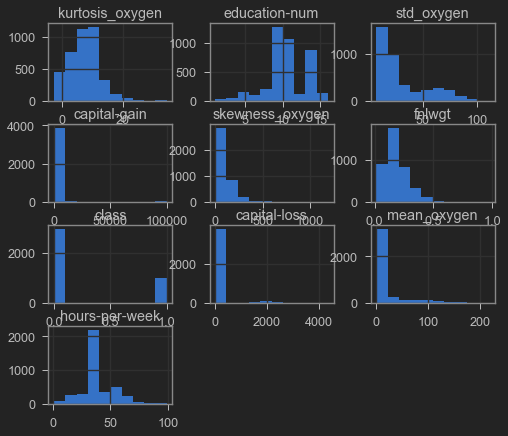

In [36]:
import matplotlib.pyplot as plt
Modified_data_other_train.hist()

class
0.0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1.0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

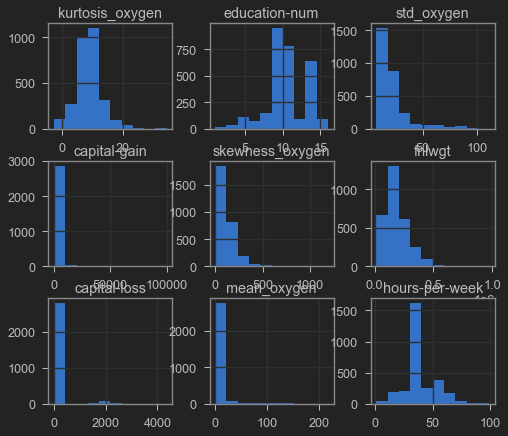

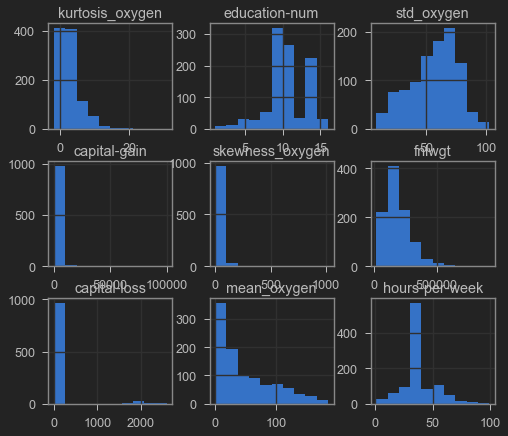

In [37]:
Modified_data_other_train.groupby('class').hist()

### Other_valid

In [38]:
Modified_data_other_valid = data_other_valid.drop(columns="Unnamed: 0")
Modified_data_other_valid.describe()

kurtosis_oxygen  education-num   std_oxygen  capital-gain  \
count      1345.000000    1351.000000  1350.000000   1348.000000   
mean          7.259099      10.076240    32.316830    863.644659   
std           4.921126       2.488365    23.111866   6022.462229   
min          -2.092918       1.000000     7.370432      0.000000   
25%           3.161200       9.000000    14.834986      0.000000   
50%           7.414002      10.000000    21.797974      0.000000   
75%          10.366821      12.000000    45.975575      0.000000   
max          34.539844      16.000000   109.712649  99999.000000   

       skewness_oxygen         fnlwgt        class  capital-loss  mean_oxygen  \
count      1350.000000    1343.000000  1346.000000   1342.000000  1346.000000   
mean         90.391395  189782.052867     0.260773     86.709389    19.491118   
std         111.455242  109653.691097     0.439219    407.827866    35.069788   
min          -1.930371   19520.000000     0.000000      0.000000     0.213211   
25%           9.201032  117083.000000     0.000000      0.000000     2.036789   
50%          60.350677  176073.000000     0.000000      0.000000     3.598662   
75%         131.015184  237839.000000     1.000000      0.000000    15.689590   
max        1191.000837  910398.000000     1.000000   3770.000000   199.577759   

       hours-per-week  
count     1347.000000  
mean        40.196733  
std         12.770603  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

array([[<AxesSubplot:title={'center':'kurtosis_oxygen'}>,
        <AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'std_oxygen'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'skewness_oxygen'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'class'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'mean_oxygen'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

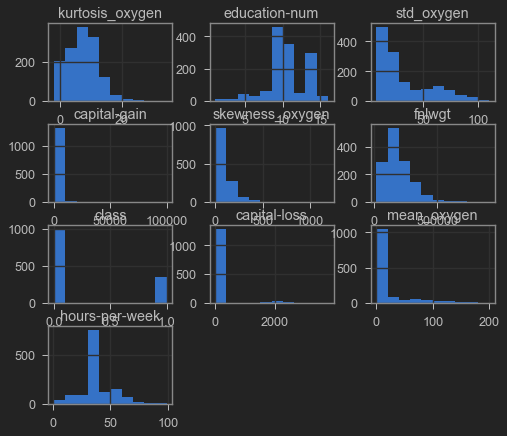

In [39]:
Modified_data_other_valid.hist()

class
0.0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1.0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

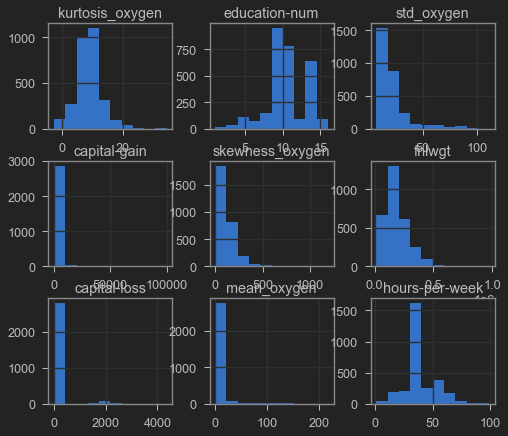

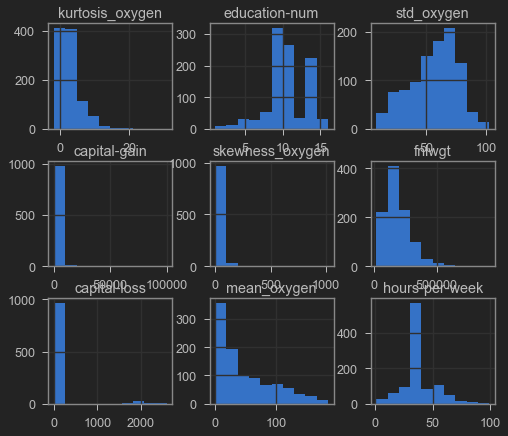

In [40]:
Modified_data_other_train.groupby('class').hist()

### personal_train

In [41]:
Modified_data_personal_train = data_personal_train.drop(columns="Unnamed: 0")
Modified_data_personal_train.describe()

age
count  3933.000000
mean     51.816934
std      11.814803
min      -1.000000
25%      44.000000
50%      52.000000
75%      60.000000
max     113.000000

In [42]:
Modified_data_personal_train.head()

name                                            address  age  \
0  Roscoe Bohannon  7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...   55   
1     Ernest Kline  391 Ball Road Suite 961\r\nFlowersborough, IN ...   50   
2  Harold Hendriks     8702 Vincent Square\r\nNew Jerryfurt, CO 30614   58   
3   Randy Baptiste     2751 Harris Crossroad\r\nWest Ashley, CA 30311   51   
4  Anthony Colucci  904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...   40   

       sex        date_of_birth  
0   Female           1964/08/25  
1     Male           1969-10-21  
2   Female           1961-04-25  
3     Male           1968-03-04  
4     Male  1979-10-11 00 00 00

In [43]:
# Modified_data_personal_train.date_of_birth = Modified_data_personal_train.date_of_birth.str.strip('00 00 00')
# Modified_data_personal_train.date_of_birth = Modified_data_personal_train.date_of_birth.str.strip('00:00:')
# Modified_data_personal_train.date_of_birth = Modified_data_personal_train.date_of_birth.str.strip('00:00:00')
# pd.to_datetime(Modified_data_personal_train.date_of_birth,errors='raise').dt.strftime('%Y-%m-%d')

In [44]:
Modified_data_personal_train.date_of_birth.head()

0             1964/08/25
1             1969-10-21
2             1961-04-25
3             1968-03-04
4    1979-10-11 00 00 00
Name: date_of_birth, dtype: object

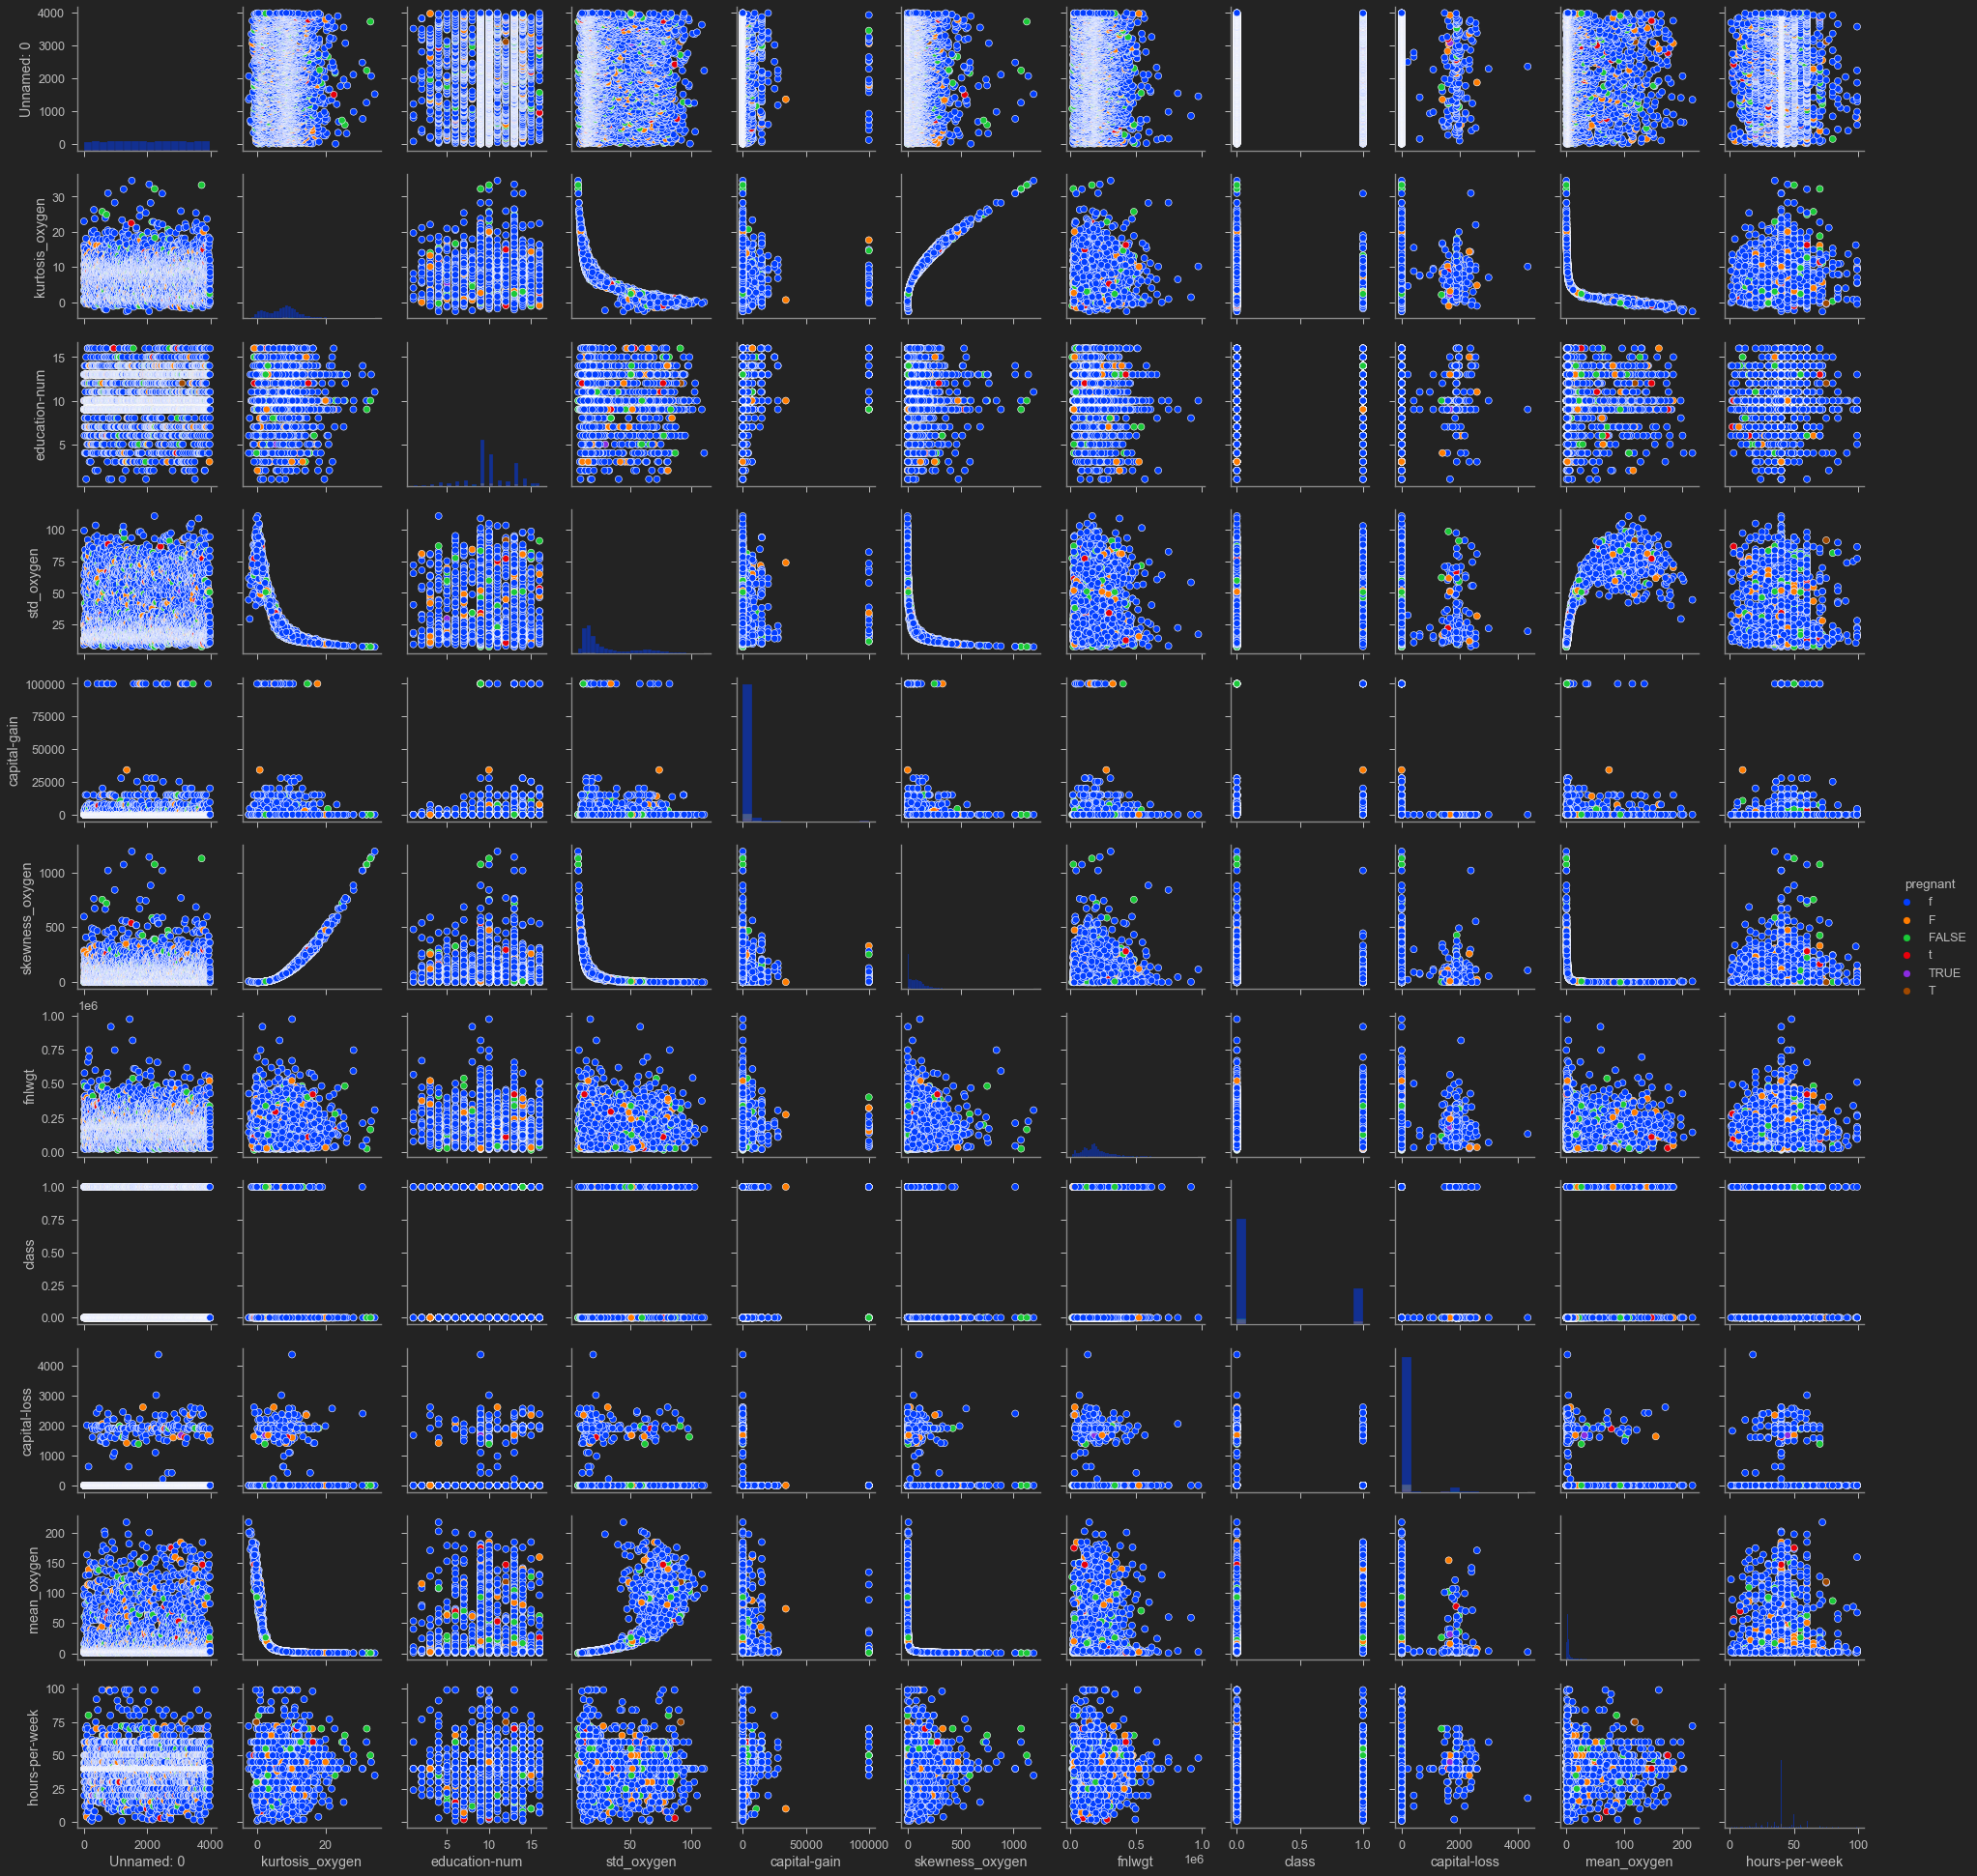

In [45]:
sns.pairplot(data_other_train, hue="pregnant", palette="bright", diag_kind="hist")

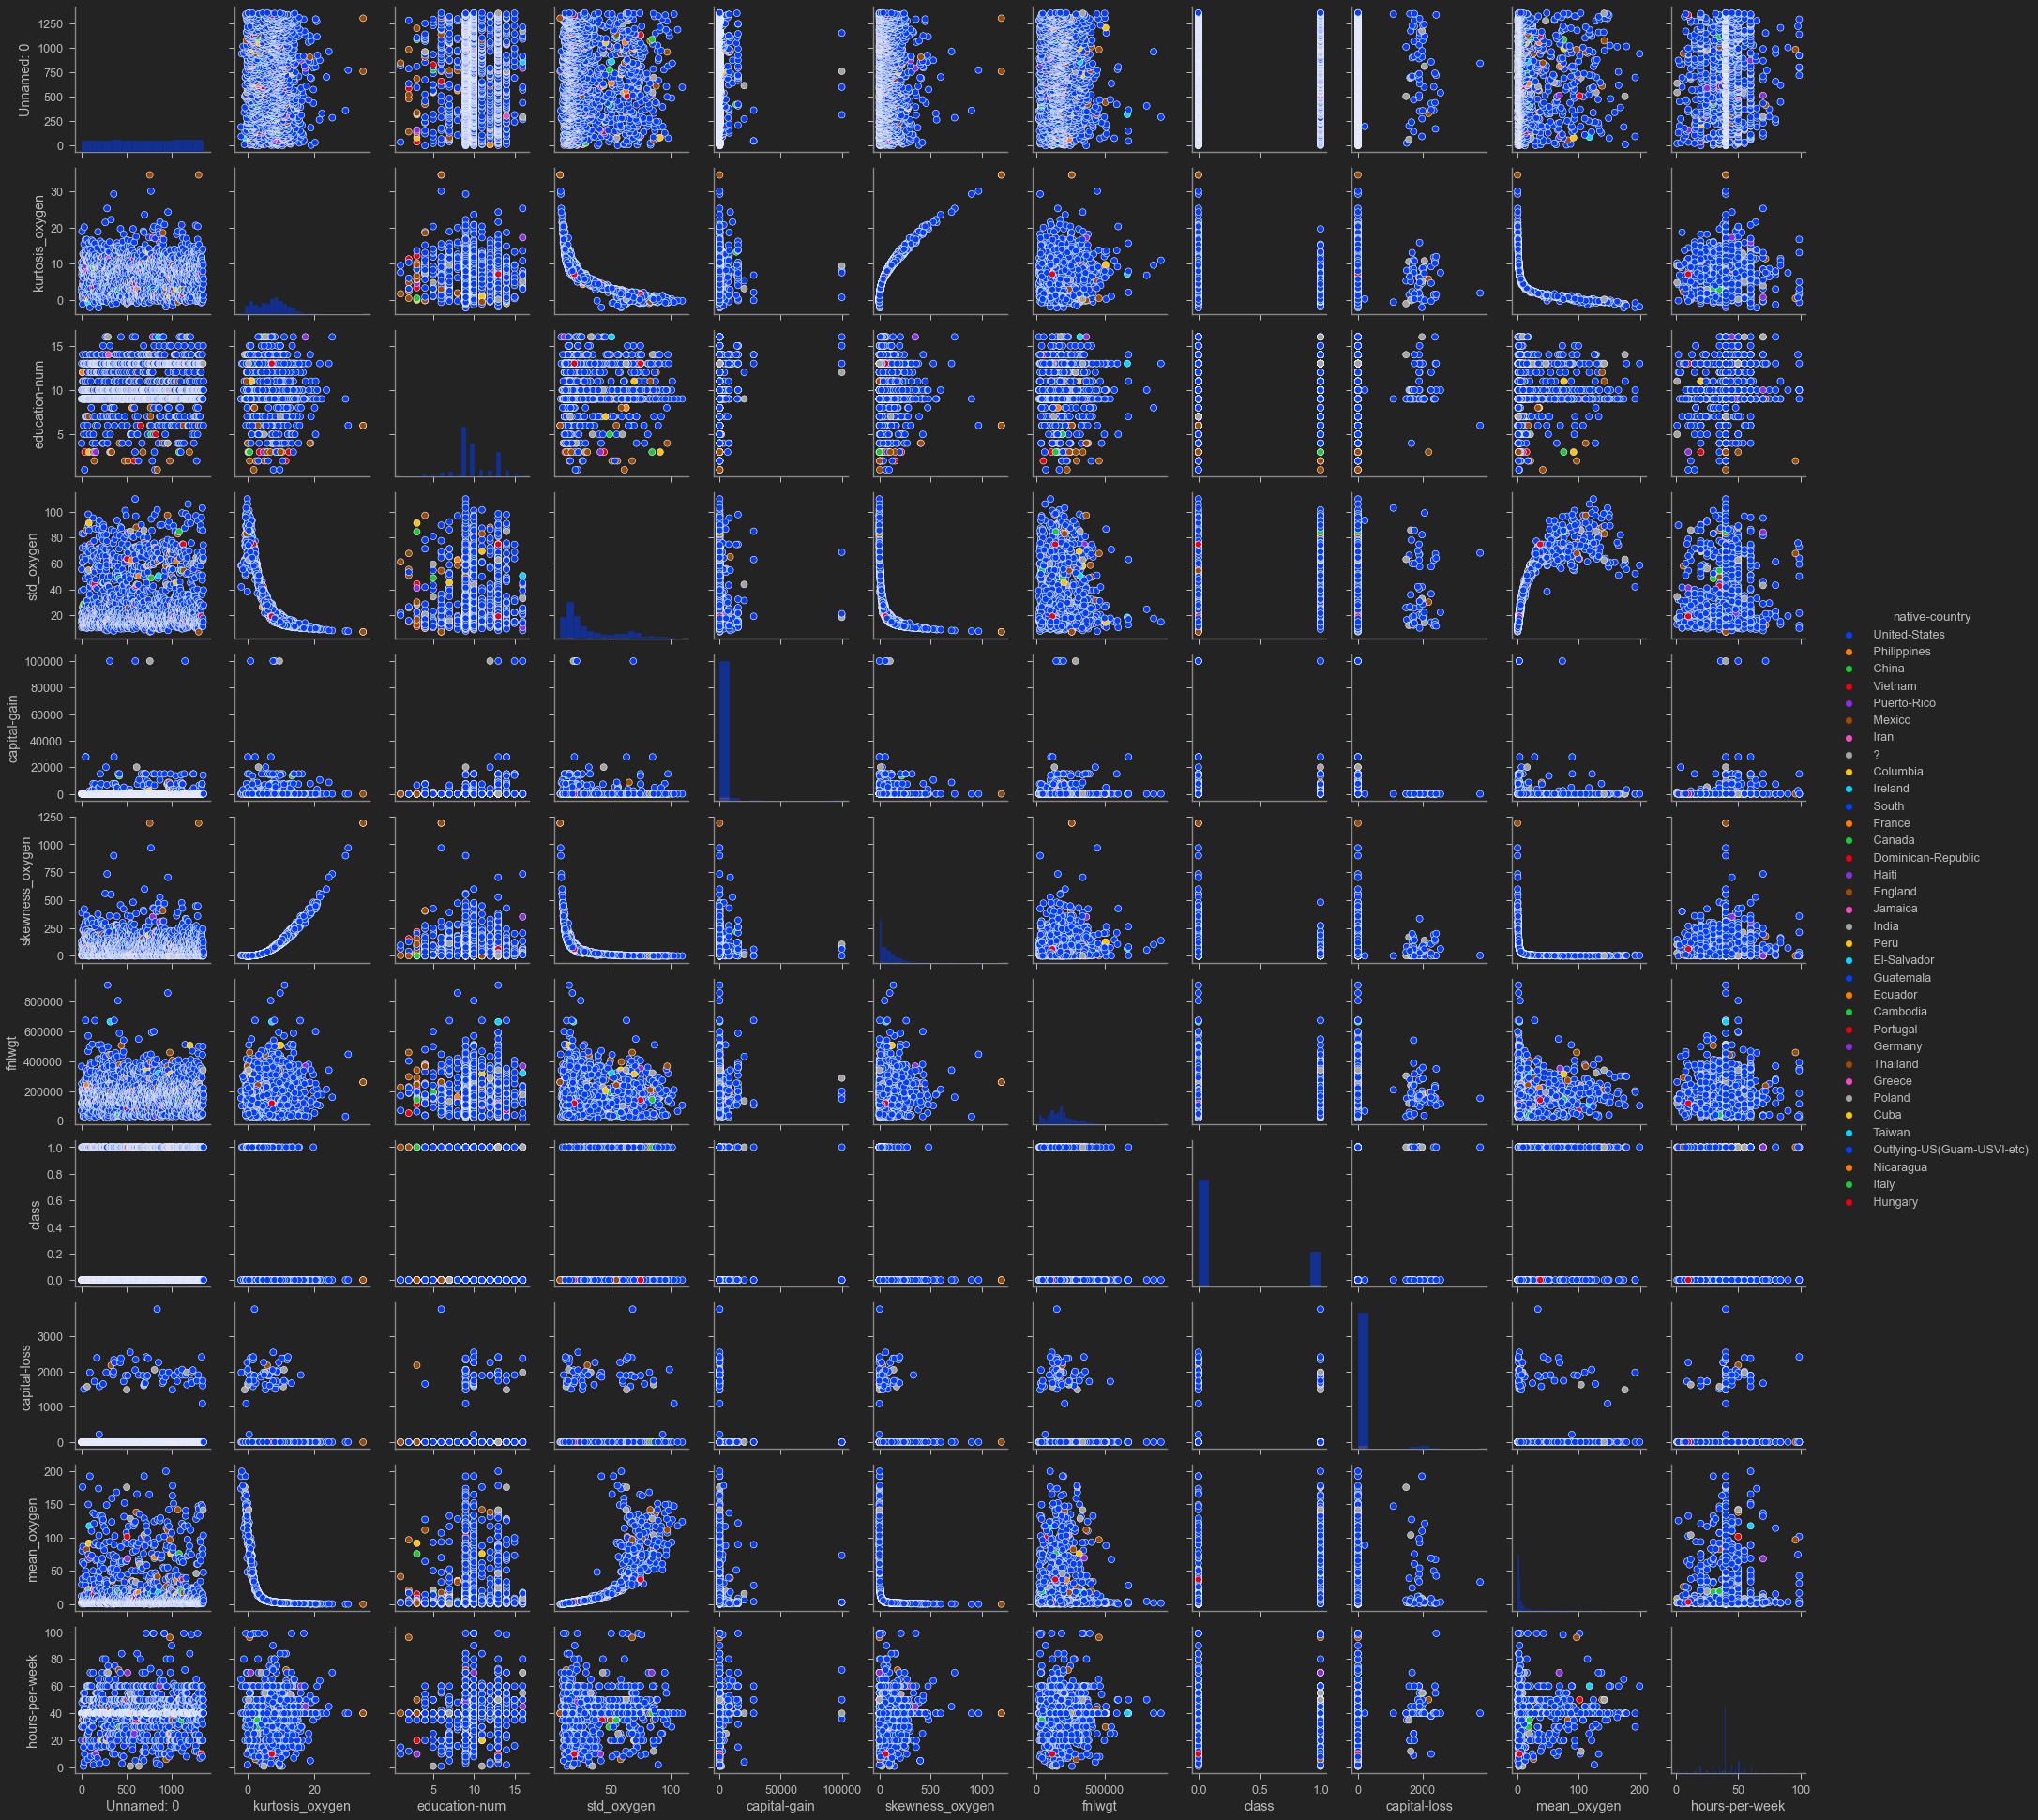

In [46]:
sns.pairplot(data_other_valid, hue="native-country", palette="bright", diag_kind="hist")

### Dôležité grafy

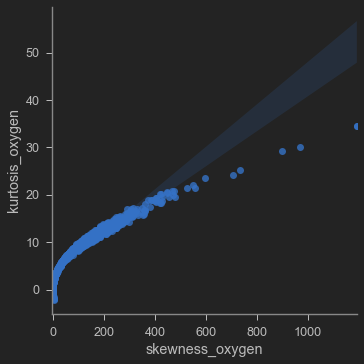

In [47]:
#sns.pairplot(data_other_valid, y_vars="kurtosis_oxygen", x_vars="skewness_oxygen" ,hue="occupation", palette="rainbow")
sns.lmplot(x="skewness_oxygen", y="kurtosis_oxygen", data=data_other_valid, palette="rainbow")

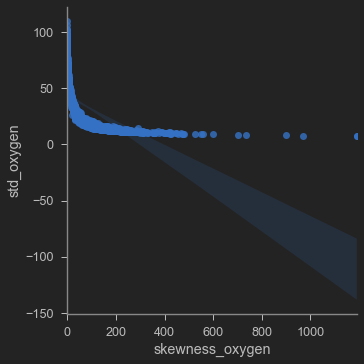

In [48]:
sns.lmplot(x="skewness_oxygen", y="std_oxygen", data=data_other_valid, palette="rainbow")

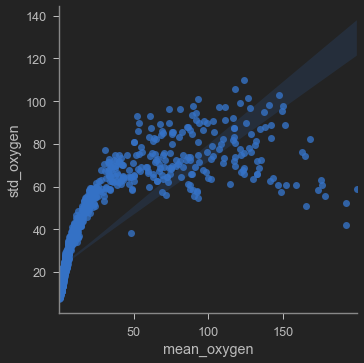

In [49]:
sns.lmplot(x="mean_oxygen", y="std_oxygen",data=data_other_valid, palette="rainbow")

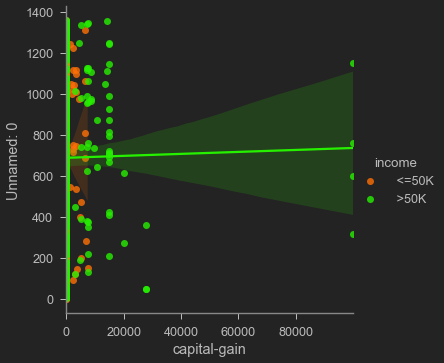

In [50]:
sns.lmplot(x="capital-gain", y="Unnamed: 0",hue="income", data=data_other_valid, palette="gist_ncar_r")

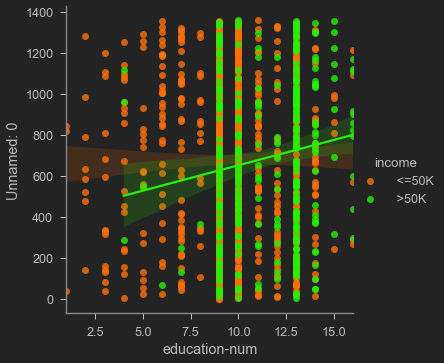

In [51]:
sns.lmplot(x="education-num", y="Unnamed: 0",hue="income", data=data_other_valid, palette="gist_ncar_r")

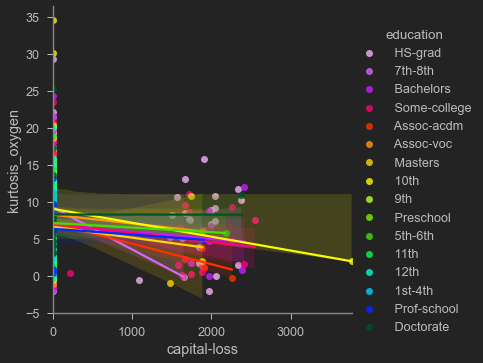

In [52]:
sns.lmplot(x="capital-loss", y="kurtosis_oxygen",hue="education", data=data_other_valid, palette="gist_ncar_r")

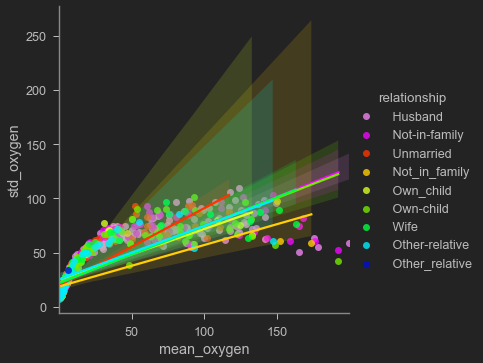

In [53]:
sns.lmplot(x="mean_oxygen", y="std_oxygen",hue="relationship", data=data_other_valid, palette="gist_ncar_r")

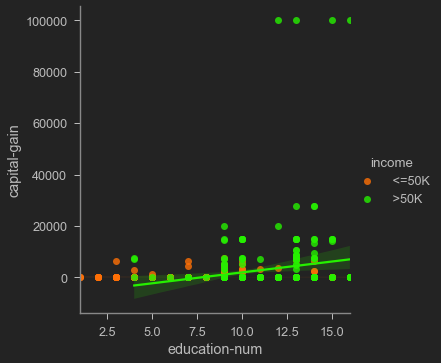

In [54]:
sns.lmplot(x="education-num", y="capital-gain",hue="income", data=data_other_valid, palette="gist_ncar_r")

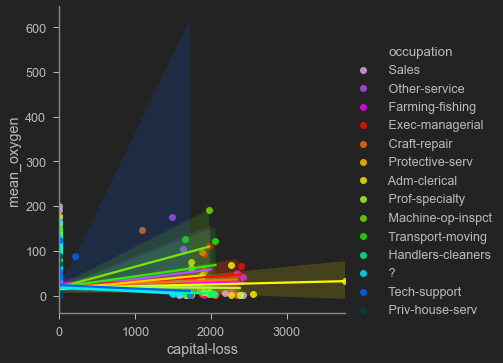

In [55]:
sns.lmplot(x="capital-loss", y="mean_oxygen",hue="occupation", data=data_other_valid, palette="gist_ncar_r")

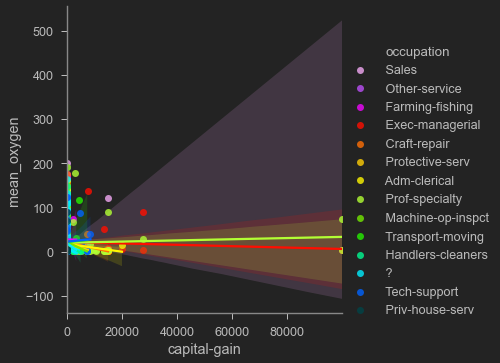

In [56]:
sns.lmplot(x="capital-gain", y="mean_oxygen",hue="occupation", data=data_other_valid, palette="gist_ncar_r")

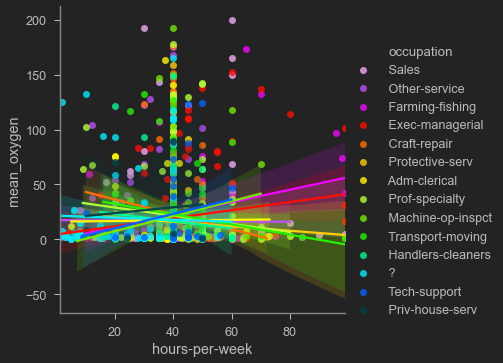

In [57]:
sns.lmplot(x="hours-per-week", y="mean_oxygen",hue="occupation", data=data_other_valid, palette="gist_ncar_r")

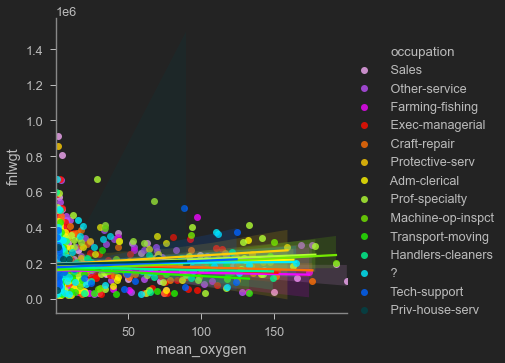

In [58]:
sns.lmplot(x="mean_oxygen", y="fnlwgt",hue="occupation", data=data_other_valid, palette="gist_ncar_r")

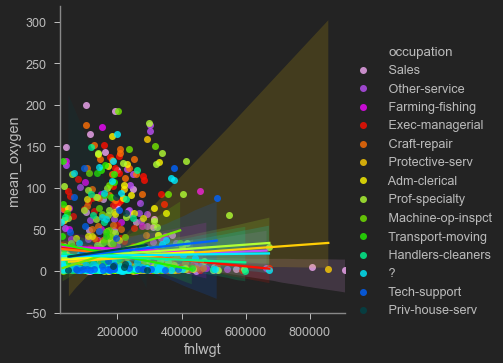

In [59]:
sns.lmplot(y="mean_oxygen", x="fnlwgt",hue="occupation", data=data_other_valid, palette="gist_ncar_r")

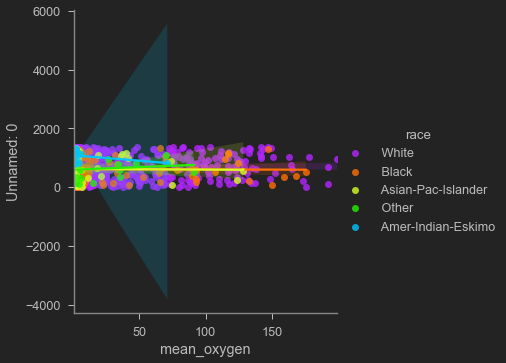

In [60]:
sns.lmplot(x="mean_oxygen", y="Unnamed: 0",hue="race", data=data_other_valid, palette="gist_ncar_r")

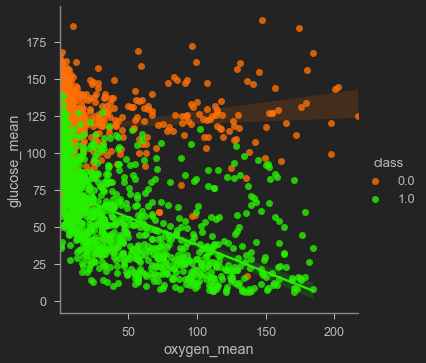

In [61]:
sns.lmplot(x="oxygen_mean", y="glucose_mean", hue="class" ,data=skewness_class_df,palette="gist_ncar_r")
# Ludia s cukrovkou maju nizsiu hladinu cukru v krvi

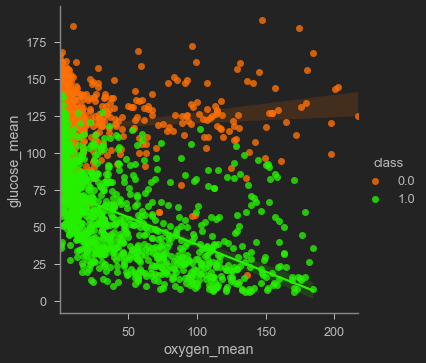

In [62]:
sns.lmplot(x="oxygen_mean", y="glucose_mean", hue="class" ,data=skewness_class_df,palette="gist_ncar_r")

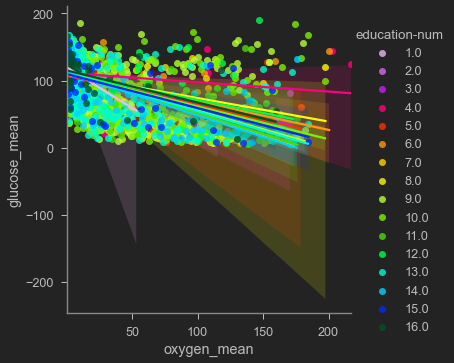

In [63]:
sns.lmplot(x="oxygen_mean", y="glucose_mean", hue="education-num" ,data=skewness_class_df,palette="gist_ncar_r")
# Vyzsi priemerny kyslik a menej stabilnu hladinu cukru maju ludia s nizsim vzdelanim(mladsi prevdepodobne)

In [64]:
data_other_train["race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other', nan], dtype=object)

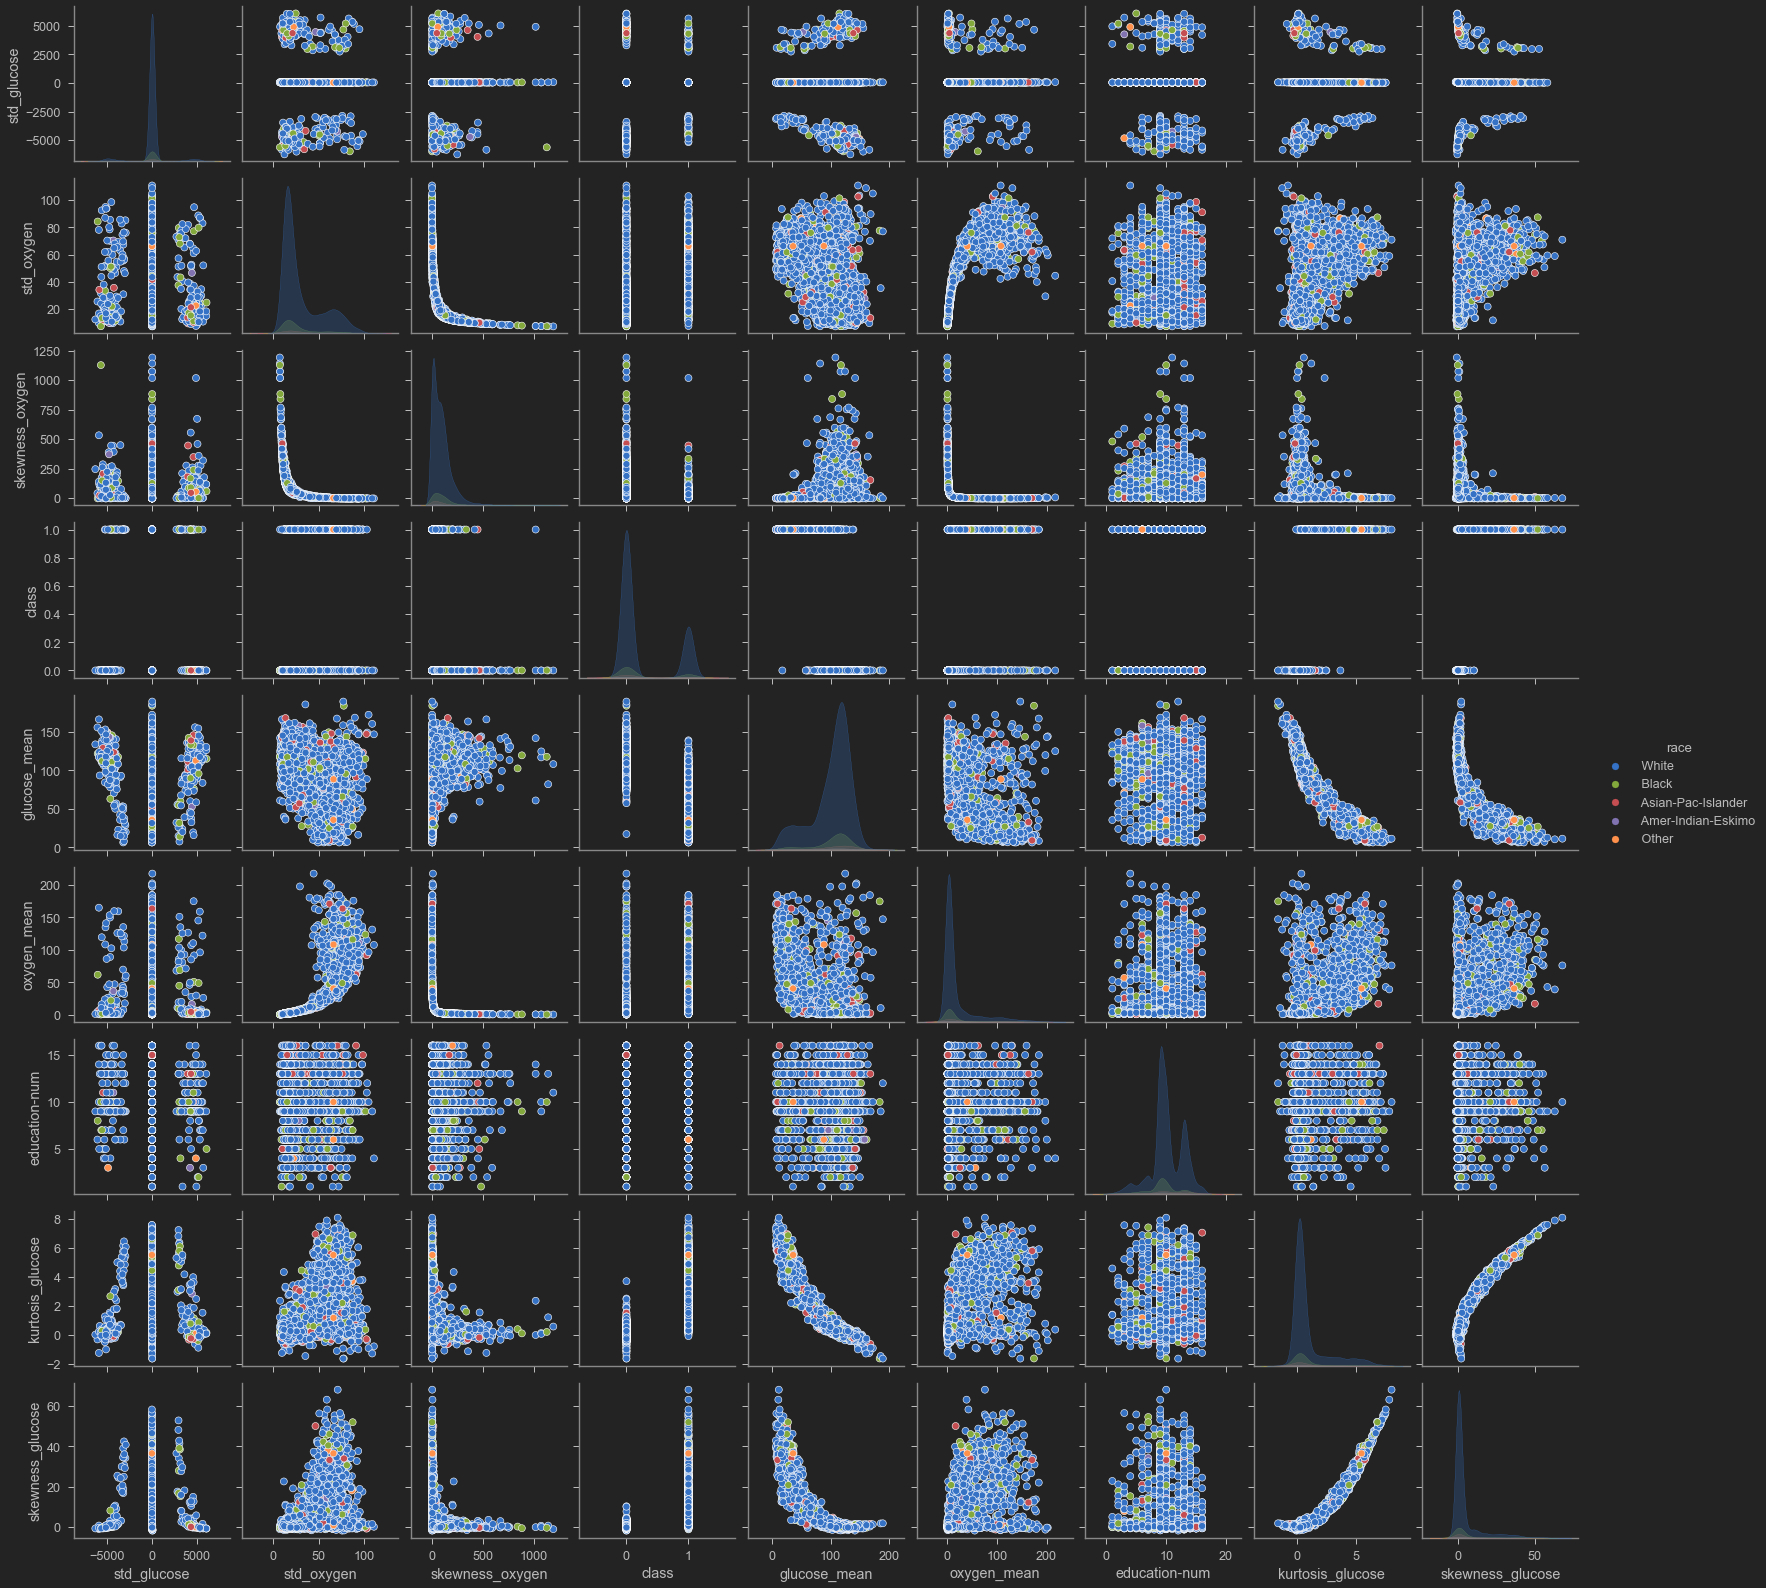

In [65]:
sns.pairplot(skewness_class_df, hue="race")

# Formulácia a štatistické overenie hypotéz o dátach

### QQ plot

<ipython-input-66-4467c28c9c5a>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  py.show()


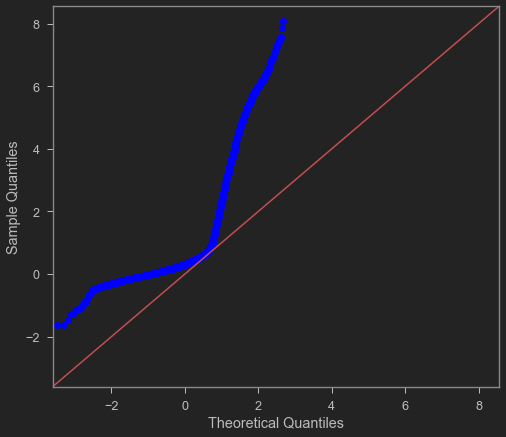

In [66]:
import statsmodels.api as sm

py = sm.qqplot(skewness_class_df["kurtosis_glucose"], line='45')
py.show()

The qq plot is right-skewed because it is tilted to the right "above the 45 line"

### Shapiro-Wilk test of normality

C:\Users\alqna\anaconda3\envs\IAU\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.0
Normal distribution (fail to reject H0)


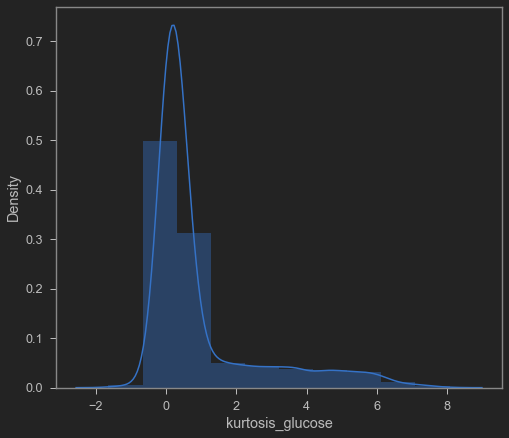

In [67]:
from scipy.stats import shapiro

np.random.seed(123)
x= skewness_class_df["kurtosis_glucose"]

sns.distplot(x, bins=10)

shapiro_test = shapiro(x)
print(shapiro_test[1])

# interpret
alpha = 0.05
if shapiro_test[1] > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

The graph shows that the distribution is a right-skewed distribution because the mean to the right of the median.

<ipython-input-68-c5e3af221ec1>:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pa.show()


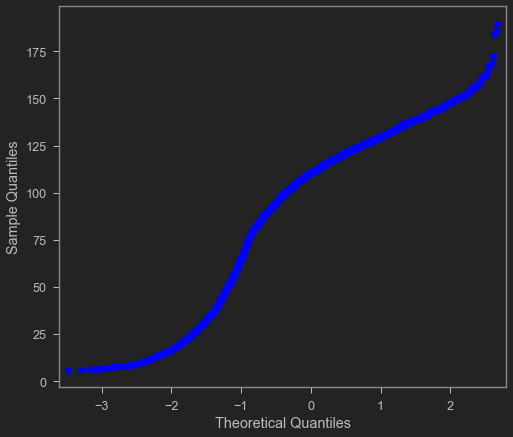

In [68]:
pa = sm.qqplot(skewness_class_df["glucose_mean"])
pa.show()

C:\Users\alqna\anaconda3\envs\IAU\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1.0
Normal distribution (fail to reject H0)


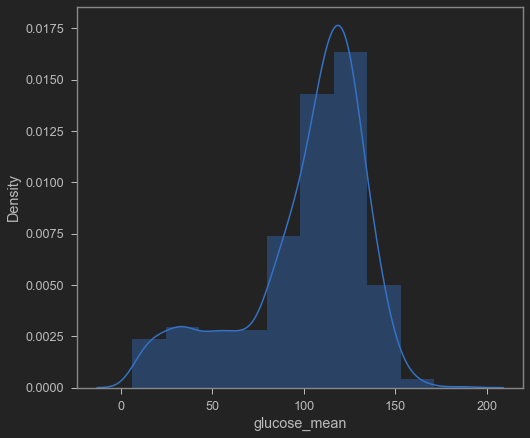

In [69]:
from scipy.stats import shapiro

np.random.seed(123)
x= skewness_class_df["glucose_mean"]

sns.distplot(x, bins=10)

shapiro_test = shapiro(x)
print(shapiro_test[1])

# interpret
alpha = 0.05
if shapiro_test[1] > alpha:
    print('Normal distribution (fail to reject H0)')
else:
    print('Another distributions (reject H0)')

From qq plot we can see that the line is heavy tailed

## Statistical hypothesis testing 

### Levene test - Variance test 

In [70]:
std_glucose_np1 = medical_info["std_glucose"].to_numpy()
std_glucose_np1 = np.array(std_glucose_np1, dtype="float")
std_glucose_np1 = std_glucose_np1[~np.isnan(std_glucose_np1)]

std_glucose_np2 = medical_info_valid["std_glucose"].to_numpy()
std_glucose_np2 = np.array(std_glucose_np2, dtype="float")
std_glucose_np2 = std_glucose_np2[~np.isnan(std_glucose_np2)]

#..............................................................

std_oxygen_np1 = data_other_train["std_oxygen"].to_numpy()
std_oxygen_np1 = np.array(std_oxygen_np1, dtype="float") 
std_oxygen_np1 = std_oxygen_np1[~np.isnan(std_oxygen_np1)]

std_oxygen_np2 = data_other_valid["std_oxygen"].to_numpy()
std_oxygen_np2 = np.array(std_oxygen_np2, dtype="float")
std_oxygen_np2 = std_oxygen_np2[~np.isnan(std_oxygen_np2)]

C:\Users\alqna\anaconda3\envs\IAU\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


LeveneResult(statistic=0.02730490556146607, pvalue=0.8687605211734362)
Equal variances (fail to reject H0)


C:\Users\alqna\anaconda3\envs\IAU\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


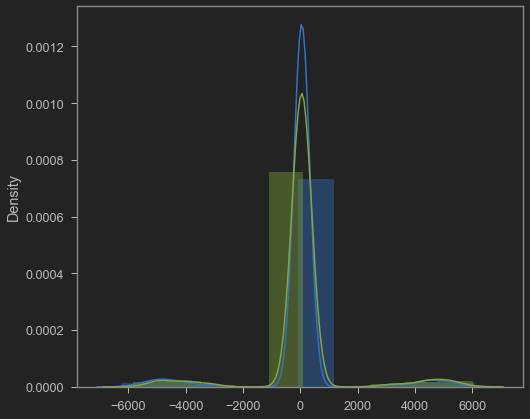

In [71]:
from scipy.stats import levene
levene_test = levene(std_glucose_np1,std_glucose_np2)
print(levene_test)

sns.distplot(std_glucose_np1, bins=10)
sns.distplot(std_glucose_np2, bins=10)
# interpret
alpha = 0.05
if levene_test[1] > alpha:
    print('Equal variances (fail to reject H0)')
else:
    print('Another variances (reject H0)')

The  p-value > 0.05 suggests that the populations have equal variances.

### Student’s T-test 

C:\Users\alqna\anaconda3\envs\IAU\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\alqna\anaconda3\envs\IAU\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Statistics=-1.586, p=0.113
Same distributions (fail to reject H0)


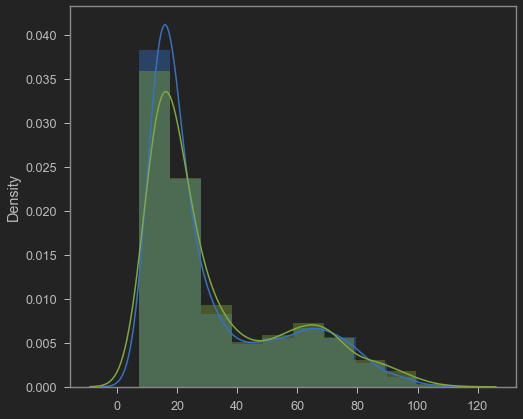

In [72]:
from scipy.stats import ttest_ind


data1 = std_oxygen_np1
data2 = std_oxygen_np2

sns.distplot(data1, bins=10)
sns.distplot(data2, bins=10)

# compare samples
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

The p-value > 0.05 suggests that the populations have equal distributions.